Start with some basic plots of the SIMBA near the SLEIGH, maybe add in other SEB/met variables
Particularly interested if there's a change in temperature responses that you can relate to ice

Some more info on near SIMBA thermistor locations:

at install thermistor #100 and #180 were at the surface; #150 was off the upper support wood, as in it's the top of the profile into the snow; #80 and #160 were at the same height in the air

at demob, thermistor #209 was just above the ice chunk, about (187-59)cm below the surface

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import interpolate
import datetime
import cmocean
from matplotlib.dates import DateFormatter
import glob

In [2]:
def load_netcdf(filepath, in_vars):
    """ open netcdf file, load variables (in_vars should be a list) and
        output dictionary of variables"""
    from netCDF4 import Dataset

    out_vars = {}

    open_netcdf = Dataset(filepath, mode = 'r')
    if len(in_vars)>0:
        for var in in_vars:
            out_vars[var] = open_netcdf.variables[var][:]
    else:
        for var in open_netcdf.variables.keys():
            out_vars[var] = open_netcdf.variables[var][:]

    try:
        out_vars['time_unit'] = open_netcdf.variables['time'].units
    except:
        None
    open_netcdf.close()
    #print(out_vars.keys())
    return out_vars

In [3]:
simba_filepath = '/psd3data/arctic/raven/simba/level1/'

First open and plot data, check difference between level1/firnprofile.sled.level1.15min.20240320.000000.nc and summary_simba_20240320.nc

In [4]:
lev1_file = 'firnprofile.sled.level1.15min.20240522.000000.nc'

In [5]:
lev1_data = load_netcdf(simba_filepath+lev1_file, [])

In [6]:
print(lev1_data.keys())

dict_keys(['time', 'height', 'temperature', 'sample_start', 'sample_end', 'sample_span', 'battery_voltage', 'sequence_number', 'sample_number', 'time_unit'])


In [7]:
print(lev1_data['temperature'].shape)

(96, 241)


level1 file (96,)


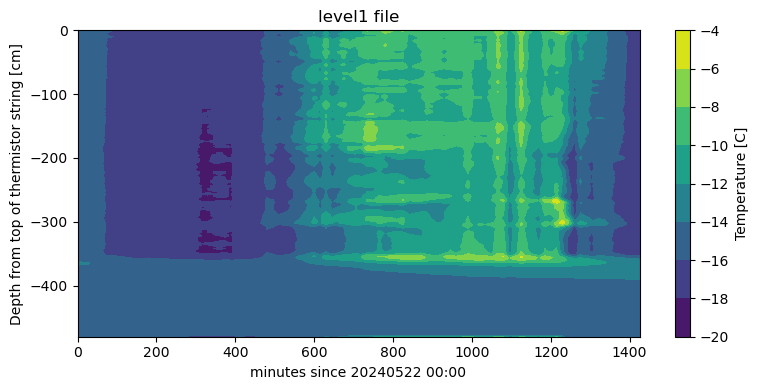

In [23]:
fig, ax = plt.subplots(1, figsize=(8,4))

#for ax, data_dic, label in zip(axs.ravel(), [summ_data, lev1_data],['summary file','level1 file']):
cb = ax.contourf(lev1_data['time'], lev1_data['height'], np.swapaxes(lev1_data['temperature'],0,1))
print(label, lev1_data['time'].shape)
ax.set_ylabel('Depth from top of thermistor string [cm]')
ax.set_xlabel('minutes since 20240522 00:00')
plt.colorbar(cb, ax=ax, label='Temperature [C]')

ax.set_title(label)

plt.tight_layout()
plt.show()

From SIMBA/flux plate layer id, expect ice chunk to start around -128cm

In [4]:
## try opening all files and plotting

# turn into function later

lev1_files = glob.glob(simba_filepath+'*.nc')
lev1_files.sort()

## get rid of march files, will also probably want to get rid of first few days of actual data after install as well?
lev1_files = lev1_files[5:]
print(lev1_files[0])


/psd3data/arctic/raven/simba/level1/firnprofile.sled.level1.15min.20240513.000000.nc


In [5]:
varnames = ['temperature','height','time']

season_data = {}

for fname in lev1_files[:]:
    fdic = load_netcdf(fname, varnames)

    fstart_time = datetime.datetime.strptime(fdic['time_unit'][-19:], '%Y-%m-%d %H:%M:%S')
    fdic['dates'] = np.asarray([fstart_time+datetime.timedelta(minutes=int(m)) for m in fdic['time']])

    for var in ['temperature','dates']:
        if var not in season_data:
            season_data[var] = fdic[var]
        else:
            season_data[var] = np.ma.concatenate( (season_data[var], fdic[var]), axis=0 )

    ## only want one height:
    if 'height' not in season_data:
        season_data['height'] = fdic['height']
    print(season_data['dates'].shape, season_data['height'].shape, season_data['temperature'].shape)

(96,) (241,) (96, 241)
(192,) (241,) (192, 241)
(288,) (241,) (288, 241)
(384,) (241,) (384, 241)
(480,) (241,) (480, 241)
(576,) (241,) (576, 241)
(672,) (241,) (672, 241)
(768,) (241,) (768, 241)
(864,) (241,) (864, 241)
(960,) (241,) (960, 241)
(1056,) (241,) (1056, 241)
(1152,) (241,) (1152, 241)
(1248,) (241,) (1248, 241)
(1344,) (241,) (1344, 241)
(1440,) (241,) (1440, 241)
(1536,) (241,) (1536, 241)
(1632,) (241,) (1632, 241)
(1728,) (241,) (1728, 241)
(1824,) (241,) (1824, 241)
(1920,) (241,) (1920, 241)
(2016,) (241,) (2016, 241)
(2112,) (241,) (2112, 241)
(2208,) (241,) (2208, 241)
(2304,) (241,) (2304, 241)
(2400,) (241,) (2400, 241)
(2496,) (241,) (2496, 241)
(2592,) (241,) (2592, 241)
(2688,) (241,) (2688, 241)
(2784,) (241,) (2784, 241)
(2880,) (241,) (2880, 241)
(2976,) (241,) (2976, 241)
(3072,) (241,) (3072, 241)
(3168,) (241,) (3168, 241)
(3264,) (241,) (3264, 241)
(3360,) (241,) (3360, 241)
(3456,) (241,) (3456, 241)
(3552,) (241,) (3552, 241)
(3648,) (241,) (3648, 2

Will want to cut off by initial surface height, and add in SLEIGH surface estimate, but for now just work on plotting gradients and edit later

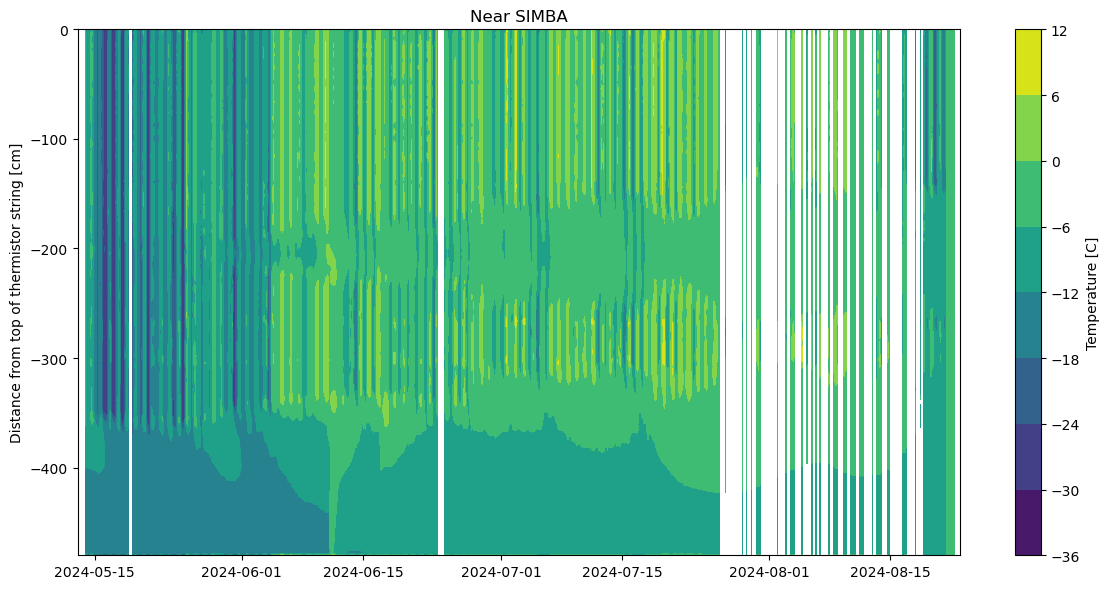

In [6]:
fig, ax = plt.subplots(1, figsize=(12,6))

#for ax, data_dic, label in zip(axs.ravel(), [summ_data, lev1_data],['summary file','level1 file']):
cb = ax.contourf(season_data['dates'], season_data['height'], np.swapaxes(season_data['temperature'],0,1))

ax.set_ylabel('Distance from top of thermistor string [cm]')
#ax.set_xlabel('minutes since 20240522 00:00')
plt.colorbar(cb, ax=ax, label='Temperature [C]')

ax.set_title('Near SIMBA')

plt.tight_layout()
plt.show()

In [7]:
## temperature dimensions are (time, height)
dTdt = (season_data['temperature'][1:,:] - season_data['temperature'][:-1,:])/(15.*60) # timesteps are 15 minutes
dTdz = (season_data['temperature'][:,1:] - season_data['temperature'][:,:-1])/0.02 # vertical resolution is 2 cm

Funny, you can tell roughly where the SIMBA is in the snow from the full SIMBA dT/dt plot

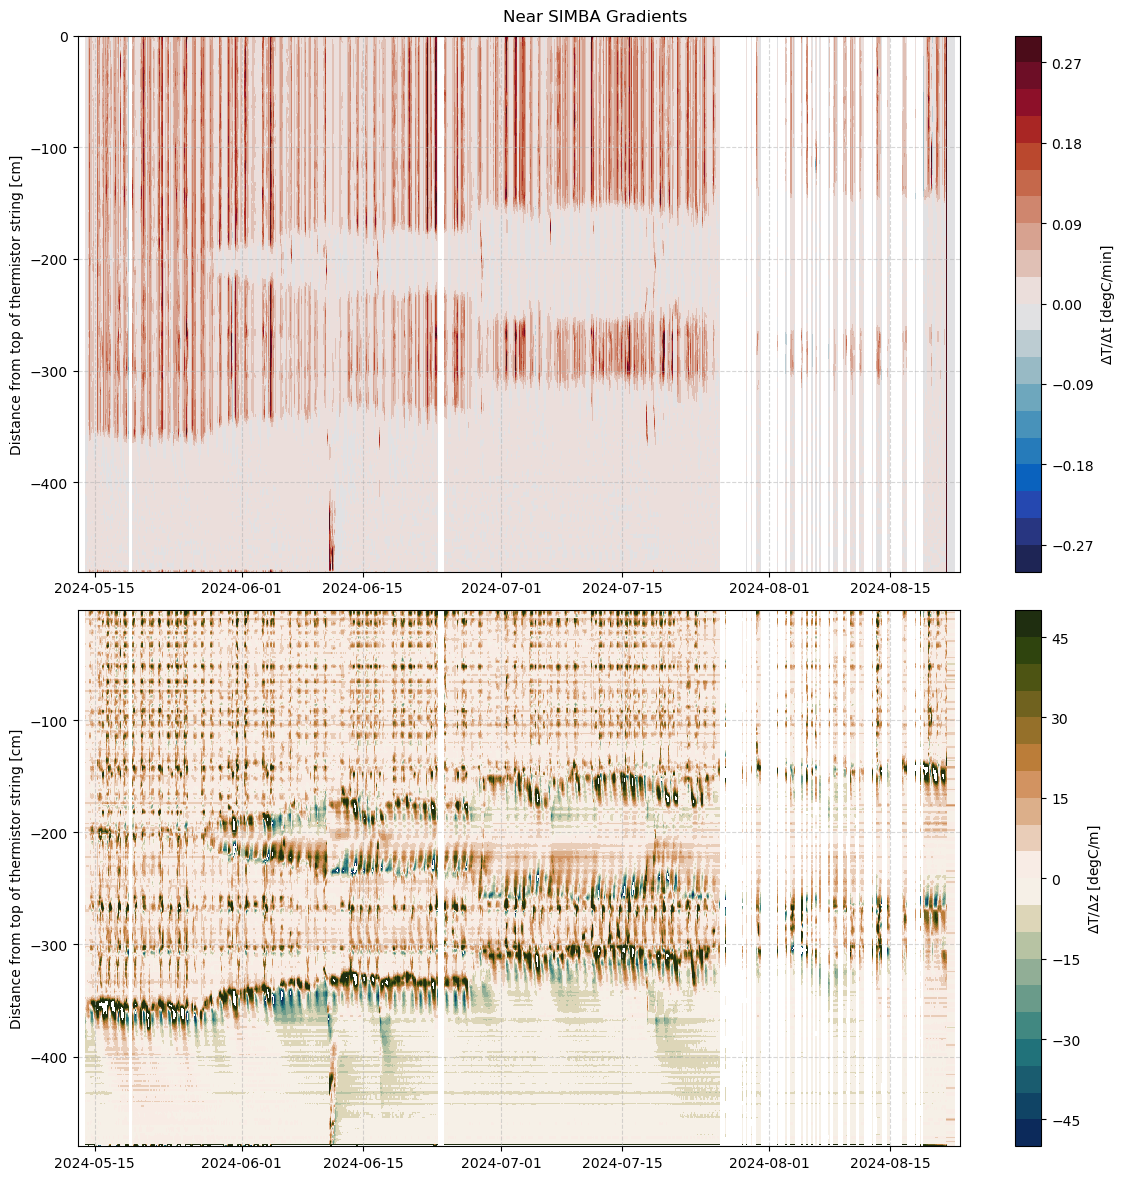

In [8]:
fig, axs = plt.subplots(2, figsize=(12,12))

## figure out pythonic looping later

cb = axs[0].contourf(season_data['dates'][1:], season_data['height'], np.swapaxes(dTdt*60,0,1), 
                     cmap=cmocean.cm.balance, levels=np.linspace(-0.3,0.3,21))
plt.colorbar(cb, ax=axs[0], label='$\Delta$T/$\Delta$t [degC/min]', extend='both')

cb = axs[1].contourf(season_data['dates'], season_data['height'][1:], np.swapaxes(dTdz,0,1), 
                     cmap=cmocean.cm.tarn_r, levels=np.linspace(-50,50,21))
plt.colorbar(cb, ax=axs[1], label='$\Delta$T/$\Delta$z [degC/m]', extend='both')

for ax in axs.ravel():
    ax.set_ylabel('Distance from top of thermistor string [cm]')
    ax.grid(alpha=.5, ls='--')
fig.suptitle('Near SIMBA Gradients')

plt.tight_layout()
plt.show()

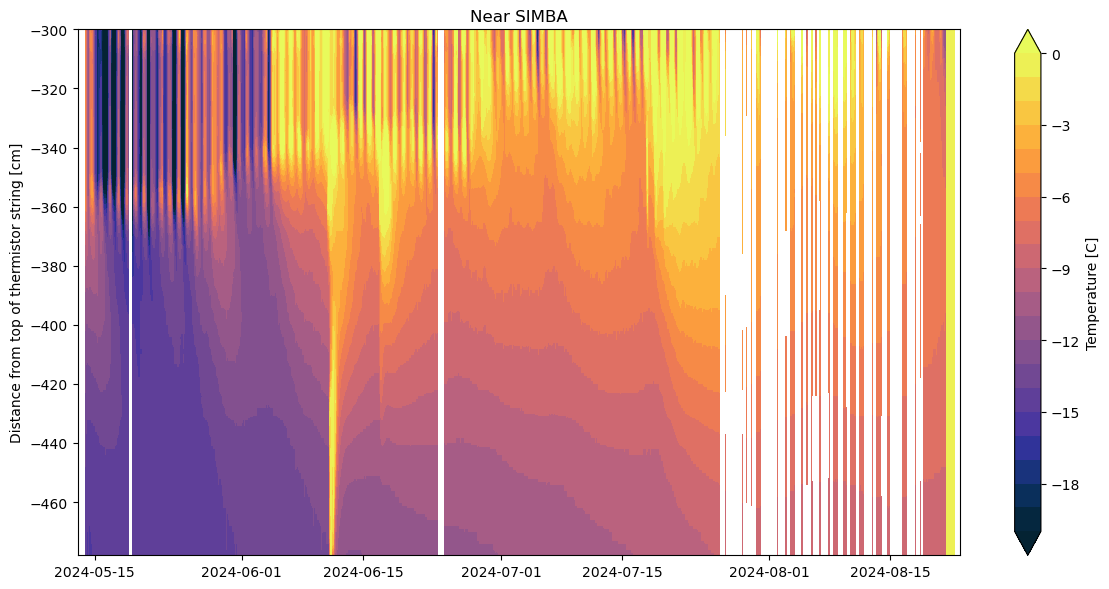

In [10]:
## cut off from thermistor (#150 - -300cm) that was off of top block
## although I think it got buried by demob?

fig, ax = plt.subplots(1, figsize=(12,6))

#for ax, data_dic, label in zip(axs.ravel(), [summ_data, lev1_data],['summary file','level1 file']):
cb = ax.contourf(season_data['dates'], season_data['height'], np.swapaxes(season_data['temperature'],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(-20,1,1), extend='both')

ax.set_ylabel('Distance from top of thermistor string [cm]')
ax.set_ylim(-478,-300)
#ax.set_xlabel('minutes since 20240522 00:00')
plt.colorbar(cb, ax=ax, label='Temperature [C]')

ax.set_title('Near SIMBA')

plt.tight_layout()
plt.show()

In [9]:
dTdt_hr = dTdt*60*60

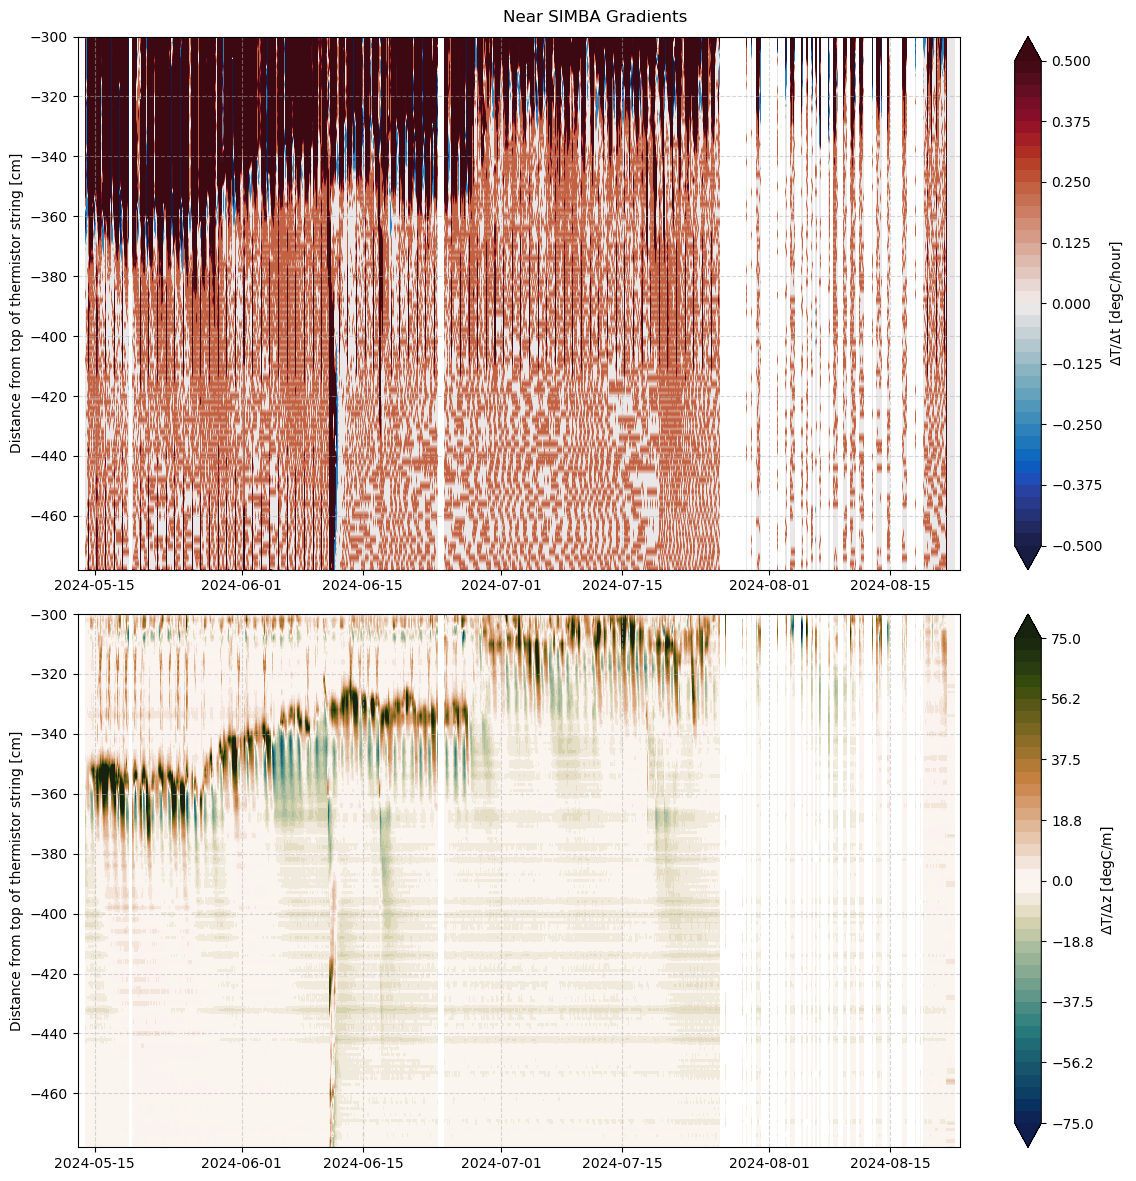

In [12]:
fig, axs = plt.subplots(2, figsize=(12,12))

## figure out pythonic looping later

cb = axs[0].contourf(season_data['dates'][1:], season_data['height'], np.swapaxes(dTdt_hr,0,1), 
                     cmap=cmocean.cm.balance, levels=np.linspace(-0.5,0.5,41), extend='both')
plt.colorbar(cb, ax=axs[0], label='$\Delta$T/$\Delta$t [degC/hour]')

cb = axs[1].contourf(season_data['dates'], season_data['height'][1:], np.swapaxes(dTdz,0,1), 
                     cmap=cmocean.cm.tarn_r, levels=np.linspace(-75,75,41), extend='both')
plt.colorbar(cb, ax=axs[1], label='$\Delta$T/$\Delta$z [degC/m]')

for ax in axs.ravel():
    ax.set_ylim(-478, -300)
    ax.set_ylabel('Distance from top of thermistor string [cm]')
    ax.grid(alpha=.5, ls='--')
fig.suptitle('Near SIMBA Gradients')

plt.tight_layout()
plt.show()

### try adding in surface height from ASFS to check for surface
#### note that the variable is not QCed
sr50_dist_Avg = average of the uncorrected distance between the sensor and the surface during the 1 min averaging interval
I think the initial boom height was 2.8m

In [10]:
## try opening all files and plotting

# turn into function later
asfs_filepath = '/psd3data/arctic/raven/asfs/level1/'
asfs_lev1_files = glob.glob(asfs_filepath+'slow*.nc')
asfs_lev1_files.sort()


In [11]:
test_file = load_netcdf(asfs_lev1_files[0], [])
print(test_file.keys())

dict_keys(['base_time', 'time', 'time_offset', 'metek_InclX_Avg', 'metek_InclY_Avg', 'PTemp_Avg', 'batt_volt_Avg', 'sr30_swu_DegC_Avg', 'sr30_swu_DegC_Std', 'sr30_swu_Irr_Avg', 'sr30_swu_Irr_Std', 'sr30_swu_IrrC_Avg', 'sr30_swu_IrrC_Std', 'sr30_swd_DegC_Avg', 'sr30_swd_DegC_Std', 'sr30_swd_Irr_Avg', 'sr30_swd_Irr_Std', 'sr30_swd_IrrC_Avg', 'sr30_swd_IrrC_Std', 'apogee_body_T_Avg', 'apogee_body_T_Std', 'apogee_targ_T_Avg', 'apogee_targ_T_Std', 'sr50_dist_Avg', 'sr50_dist_Std', 'sr50_qc_Avg', 'vaisala_RH_Avg', 'vaisala_RH_Std', 'vaisala_T_Avg', 'vaisala_T_Std', 'vaisala_P_Avg', 'vaisala_P_Std', 'ir20_lwu_mV_Avg', 'ir20_lwu_mV_Std', 'ir20_lwu_DegC_Avg', 'ir20_lwu_DegC_Std', 'ir20_lwu_Wm2_Avg', 'ir20_lwu_Wm2_Std', 'ir20_lwd_mV_Avg', 'ir20_lwd_mV_Std', 'ir20_lwd_DegC_Avg', 'ir20_lwd_DegC_Std', 'ir20_lwd_Wm2_Avg', 'ir20_lwd_Wm2_Std', 'fp_A_mV_Avg', 'fp_A_mV_Std', 'fp_A_Wm2_Avg', 'fp_A_Wm2_Std', 'fp_B_mV_Avg', 'fp_B_mV_Std', 'fp_B_Wm2_Avg', 'fp_B_Wm2_Std', 'licor_co2_str_out_Avg', 'licor_co2_

Probably want to add:

sr30_swd_IrrC_Avg: average irradiance of the upward-facing sensor during the 1 min averaging interval

sr30_swd_Irr_Avg: average irradiance of the upward-facing sensor during the 1 min averaging interval

sr30_swu_IrrC_Avg: average irradiance of the downward-facing sensor during the 1 min averaging interval

sr30_swu_Irr_Avg: average irradiance of the downward-facing sensor during the 1 min averaging interval

apogee_body_T_Avg: average of the sensor body temperature during the 1 min averaging interval (is this the correct variable?)

apogee_targ_T_Avg: average of the sensor target 8-14 micron brightness temperature during the 1 min averaging interval

skin_temp_surface

fp_A_Wm2_mean, fp_B_Wm2_mean, fp_C_Wm2_mean: average flux during 1 min averaging interval (thermopile conductive flux plate)

In [12]:
varnames = ['sr30_swu_Irr_Avg','sr30_swu_IrrC_Avg','sr30_swd_Irr_Avg','sr30_swd_IrrC_Avg',
            'sr50_dist_Avg','apogee_body_T_Avg','apogee_targ_T_Avg','base_time','time']

asfs_data = {}

for fname in asfs_lev1_files[:]:
    print(fname)

    fdic = load_netcdf(fname, varnames)
    # print(fdic['base_time'])
    # print()
    # print(fdic['time'])
    # print(fdic['time_unit'])
    fstart_time = datetime.datetime.strptime(fdic['time_unit'], 'seconds since %Y-%m-%dT%H:%M:%S.000000')
    fdic['dates'] = np.asarray([fstart_time+datetime.timedelta(seconds=int(m)) for m in fdic['time']])

    for var in varnames[:-2]+['dates']:
        if var not in asfs_data:
            asfs_data[var] = fdic[var]
        else:
            asfs_data[var] = np.ma.concatenate( (asfs_data[var], fdic[var]), axis=0 )



/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240315.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240320.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240321.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240322.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240323.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240324.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240325.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240326.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240327.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240510.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240511.000000.nc
/psd3data/arctic/raven/asfs/level1/slow.level1.melt-sleighsfs.20240512.000000.nc
/psd3data/arctic/raven/asfs/

In [13]:
#skin_temp_mean

# turn into function later
asfs_filepath_summ = '/psd3data/arctic/raven/asfs/'
asfs_summ_files = glob.glob(asfs_filepath_summ+'*slow*.nc')
asfs_summ_files.sort()
asfs_summ_files = asfs_summ_files[8:]

In [14]:
print(asfs_summ_files[0])

/psd3data/arctic/raven/asfs/summary_asfs_slow_20240515.nc


In [15]:
varnames = ['sr30_swd_IrrC_mean','skin_temp_mean','time']

asfs_data_summ = {}

for fname in asfs_summ_files[:]:
    print(fname)

    fdic = load_netcdf(fname, varnames)
    # print(fdic['base_time'])
    # print()
    # print(fdic['time'])
    # print(fdic['time_unit'])
    fstart_time = datetime.datetime.strptime(fdic['time_unit'], 'minutes since %Y-%m-%d 00:00:00')#seconds since %Y-%m-%dT%H:%M:%S.000000')
    fdic['dates'] = np.asarray([fstart_time+datetime.timedelta(minutes=int(m)) for m in fdic['time']])
    print(fstart_time, fdic['dates'])
    for var in varnames[:-1]+['dates']:
        
        if var not in asfs_data_summ:
            asfs_data_summ[var] = fdic[var]
        else:
            asfs_data_summ[var] = np.ma.concatenate( (asfs_data_summ[var], fdic[var]), axis=0 )

/psd3data/arctic/raven/asfs/summary_asfs_slow_20240515.nc
2024-05-15 00:00:00 [datetime.datetime(2024, 5, 15, 0, 0)
 datetime.datetime(2024, 5, 15, 0, 15)
 datetime.datetime(2024, 5, 15, 0, 30)
 datetime.datetime(2024, 5, 15, 0, 45)
 datetime.datetime(2024, 5, 15, 1, 0)
 datetime.datetime(2024, 5, 15, 1, 15)
 datetime.datetime(2024, 5, 15, 1, 30)
 datetime.datetime(2024, 5, 15, 1, 45)
 datetime.datetime(2024, 5, 15, 2, 0)
 datetime.datetime(2024, 5, 15, 2, 15)
 datetime.datetime(2024, 5, 15, 2, 30)
 datetime.datetime(2024, 5, 15, 2, 45)
 datetime.datetime(2024, 5, 15, 3, 0)
 datetime.datetime(2024, 5, 15, 3, 15)
 datetime.datetime(2024, 5, 15, 3, 30)
 datetime.datetime(2024, 5, 15, 3, 45)
 datetime.datetime(2024, 5, 15, 4, 0)
 datetime.datetime(2024, 5, 15, 4, 15)
 datetime.datetime(2024, 5, 15, 4, 30)
 datetime.datetime(2024, 5, 15, 4, 45)
 datetime.datetime(2024, 5, 15, 5, 0)
 datetime.datetime(2024, 5, 15, 5, 15)
 datetime.datetime(2024, 5, 15, 5, 30)
 datetime.datetime(2024, 5, 15,

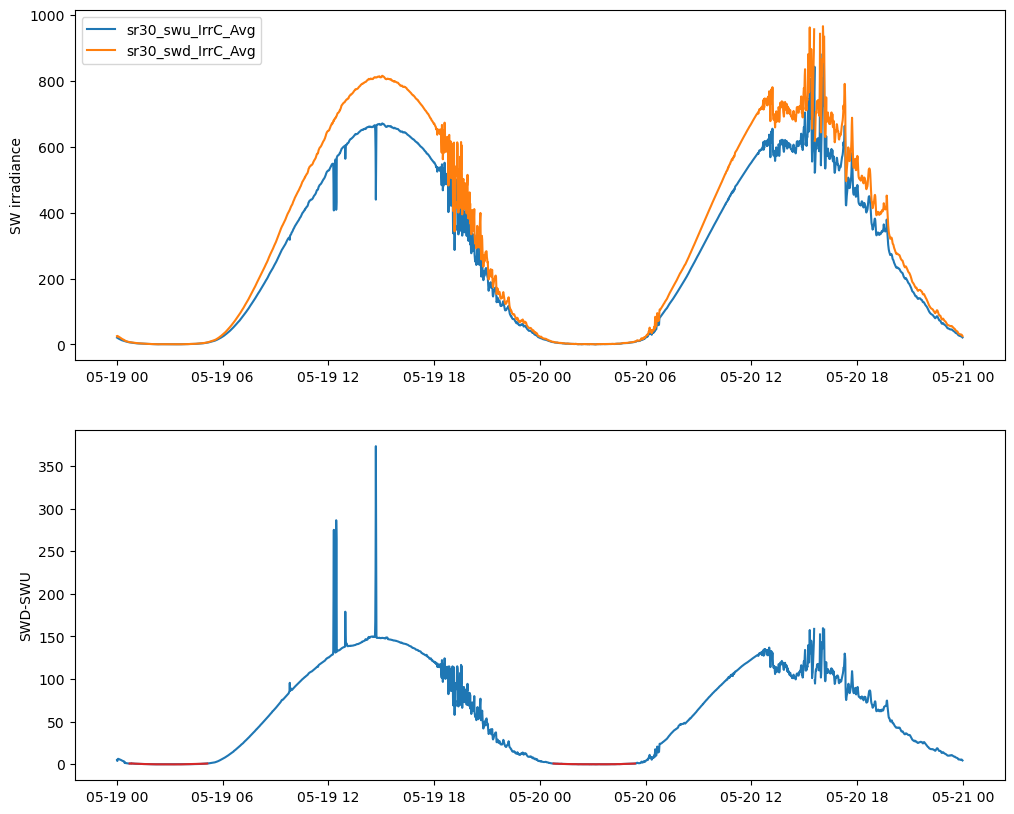

In [16]:
short_idx = np.where((asfs_data['dates']>datetime.datetime(2024,5,19))&(asfs_data['dates']<datetime.datetime(2024,5,21)))[0]
fig, axs = plt.subplots(2, figsize=(12,10))
# 'sr30_swd_Irr_Avg','sr30_swu_IrrC_Avg',



for var in ['sr30_swu_IrrC_Avg','sr30_swd_IrrC_Avg']:
    axs[0].plot(asfs_data['dates'][short_idx], np.ma.masked_outside(asfs_data[var][short_idx], -1000,1000), label=var)

axs[0].legend(loc='best')
axs[0].set_ylabel('SW irradiance')

swn = np.ma.masked_outside(asfs_data['sr30_swd_IrrC_Avg'][short_idx], -1000,1000) - np.ma.masked_outside(asfs_data['sr30_swu_Irr_Avg'][short_idx], -1000,1000)
axs[1].plot(asfs_data['dates'][short_idx], swn)

axs[1].plot(asfs_data['dates'][short_idx], np.ma.masked_greater(swn,1), c='tab:red')

axs[1].set_ylabel('SWD-SWU')

plt.show()

In [17]:
print(asfs_data['dates'][short_idx])

[datetime.datetime(2024, 5, 19, 0, 1) datetime.datetime(2024, 5, 19, 0, 2)
 datetime.datetime(2024, 5, 19, 0, 3) ...
 datetime.datetime(2024, 5, 20, 23, 57)
 datetime.datetime(2024, 5, 20, 23, 58)
 datetime.datetime(2024, 5, 20, 23, 59)]


In [18]:
print(swn.count())
print(swn.count()/13/60)

2875
3.685897435897436


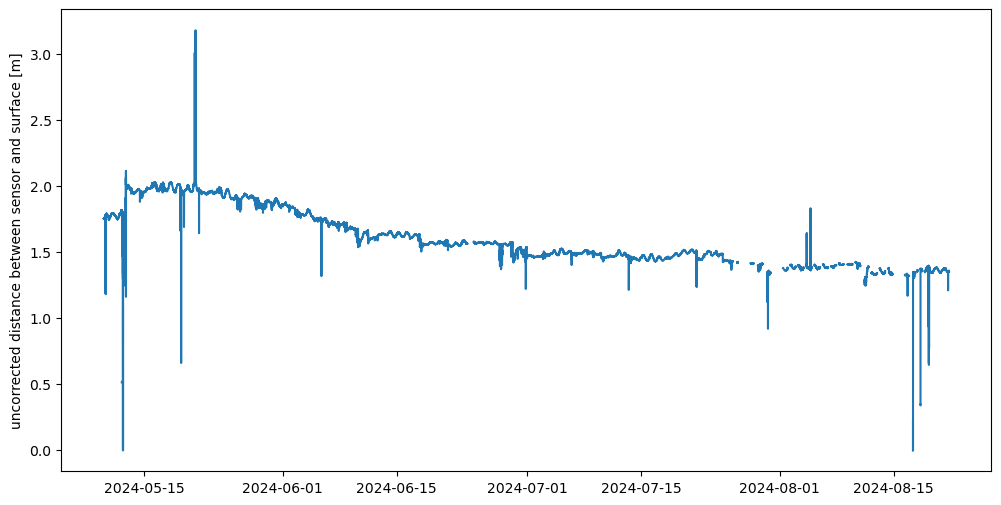

In [19]:
fig, ax = plt.subplots(1, figsize=(12,6))

ice_idx = np.where(asfs_data['dates']>datetime.datetime(2024,4,15))[0]
plt.plot(asfs_data['dates'][ice_idx], asfs_data['sr50_dist_Avg'][ice_idx])
plt.ylabel('uncorrected distance between sensor and surface [m]')
plt.show()

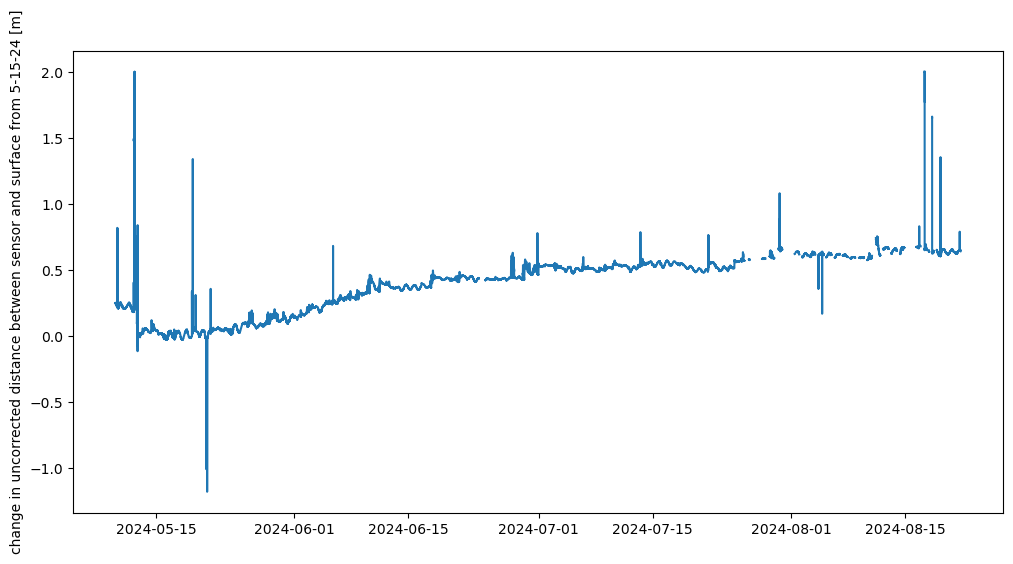

In [20]:
fig, ax = plt.subplots(1, figsize=(12,6))

ice_idx = np.where(asfs_data['dates']>datetime.datetime(2024,4,15))[0]
plt.plot(asfs_data['dates'][ice_idx], 2.-asfs_data['sr50_dist_Avg'][ice_idx])
plt.ylabel('change in uncorrected distance between sensor and surface from 5-15-24 [m]')
plt.show()

In [21]:
dTdt_hr = dTdt*60*60

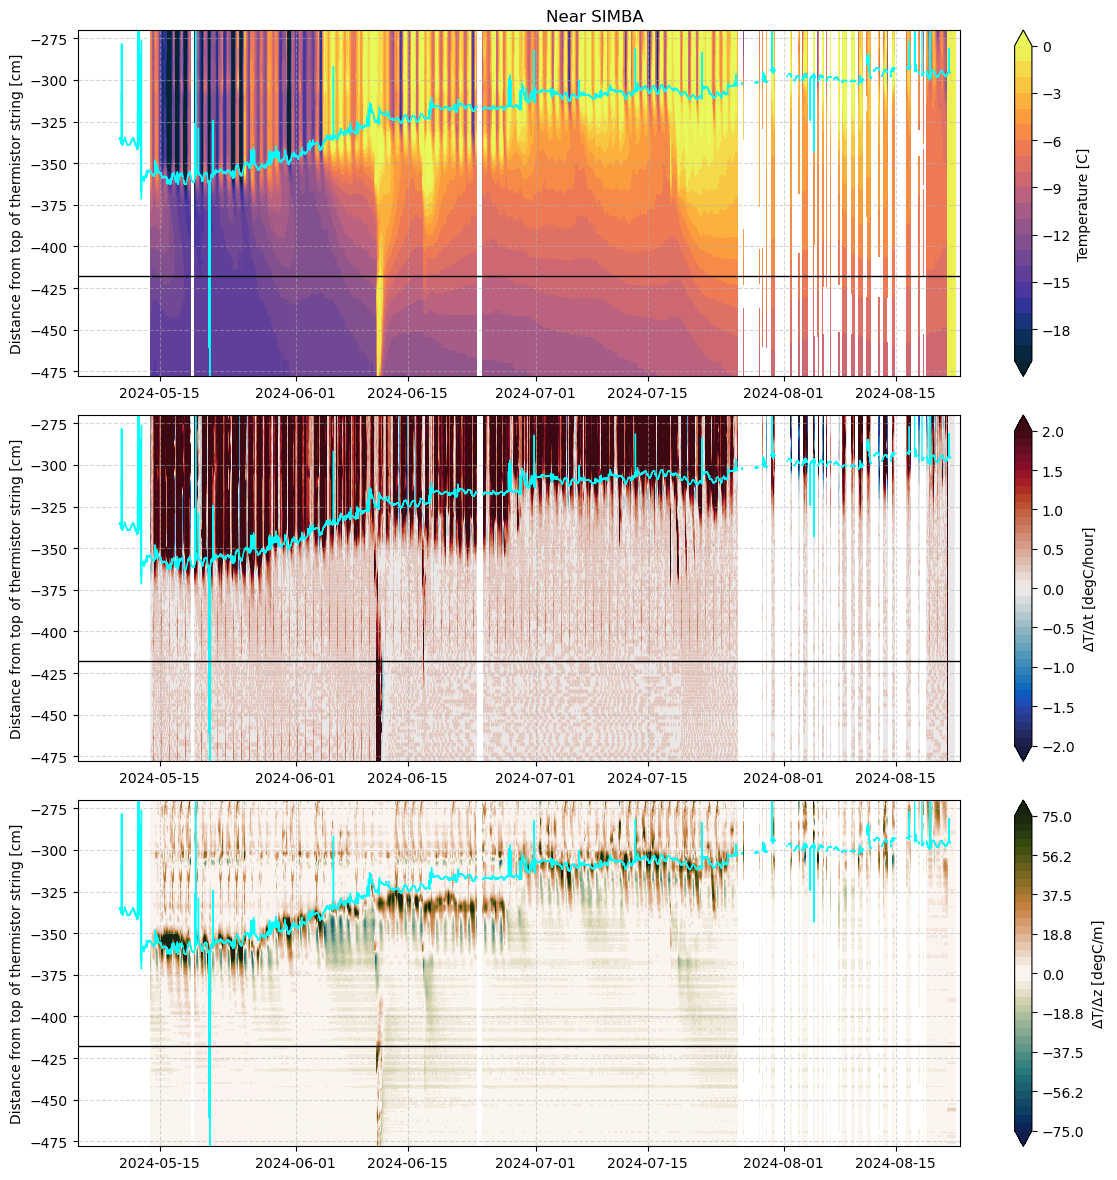

In [22]:
fig, axs = plt.subplots(3, figsize=(12,12))

## figure out pythonic looping later
cb = axs[0].contourf(season_data['dates'], season_data['height'], np.swapaxes(season_data['temperature'],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(-20,1,1), extend='both')
plt.colorbar(cb, ax=axs[0], label='Temperature [C]')

cb = axs[1].contourf(season_data['dates'][1:], season_data['height'], np.swapaxes(dTdt_hr,0,1), 
                     cmap=cmocean.cm.balance, levels=np.linspace(-2,2,41), extend='both')
plt.colorbar(cb, ax=axs[1], label='$\Delta$T/$\Delta$t [degC/hour]')

cb = axs[2].contourf(season_data['dates'], season_data['height'][1:], np.swapaxes(dTdz,0,1), 
                     cmap=cmocean.cm.tarn_r, levels=np.linspace(-75,75,41), extend='both')
plt.colorbar(cb, ax=axs[2], label='$\Delta$T/$\Delta$z [degC/m]')

for ax in axs.ravel():
    ax.set_ylim(-478, -270)
    ax.set_ylabel('Distance from top of thermistor string [cm]')
    ax.grid(alpha=.5, ls='--')
    ax.plot(asfs_data['dates'][ice_idx], -360.+(2.-asfs_data['sr50_dist_Avg'][ice_idx])*100., c='cyan', lw=1)
    ax.axhline(y=-209*2, c='k', lw=1)

fig.suptitle('Near SIMBA')

plt.tight_layout()
plt.show()

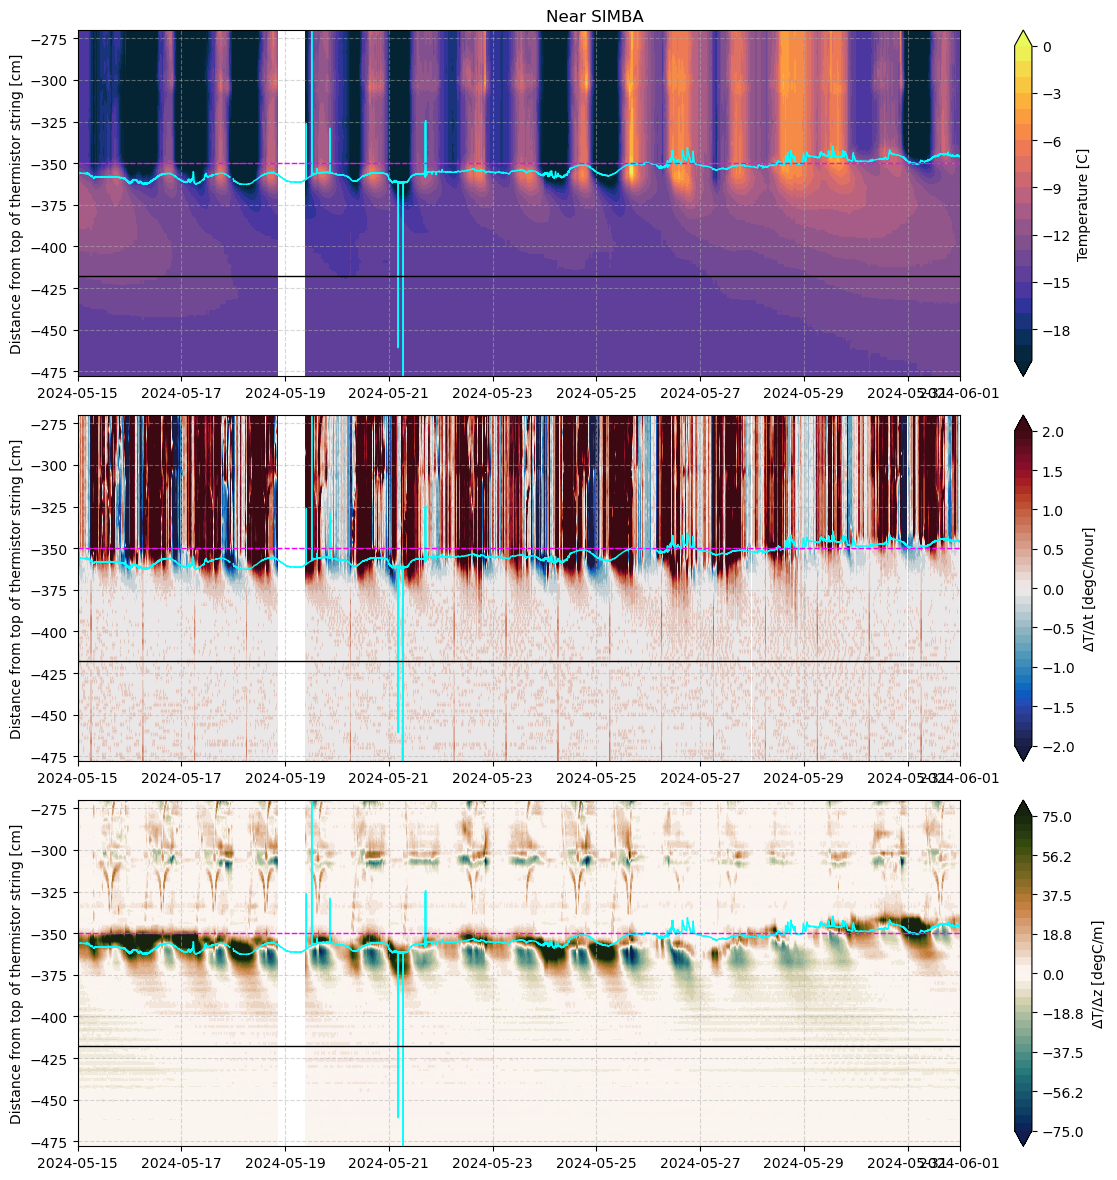

In [23]:
fig, axs = plt.subplots(3, figsize=(12,12))

## figure out pythonic looping later
cb = axs[0].contourf(season_data['dates'], season_data['height'], np.swapaxes(season_data['temperature'],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(-20,1,1), extend='both')
plt.colorbar(cb, ax=axs[0], label='Temperature [C]')

cb = axs[1].contourf(season_data['dates'][1:], season_data['height'], np.swapaxes(dTdt_hr,0,1), 
                     cmap=cmocean.cm.balance, levels=np.linspace(-2,2,41), extend='both')
plt.colorbar(cb, ax=axs[1], label='$\Delta$T/$\Delta$t [degC/hour]')

cb = axs[2].contourf(season_data['dates'], season_data['height'][1:], np.swapaxes(dTdz,0,1), 
                     cmap=cmocean.cm.tarn_r, levels=np.linspace(-75,75,41), extend='both')
plt.colorbar(cb, ax=axs[2], label='$\Delta$T/$\Delta$z [degC/m]')

for ax in axs.ravel():
    ax.set_ylim(-478, -270)
    ax.set_ylabel('Distance from top of thermistor string [cm]')
    ax.grid(alpha=.5, ls='--')
    ax.plot(asfs_data['dates'][ice_idx], -360.+(2.-asfs_data['sr50_dist_Avg'][ice_idx])*100., c='cyan', lw=1)
    ax.axhline(y=-209*2, c='k', lw=1)
    ax.axhline(y=-175*2, c='magenta', lw=1, ls='--')

    ax.set_xlim(datetime.datetime(2024,5,15), datetime.datetime(2024,6,1))
fig.suptitle('Near SIMBA')

plt.tight_layout()
plt.show()

NameError: name 'ice_idx' is not defined

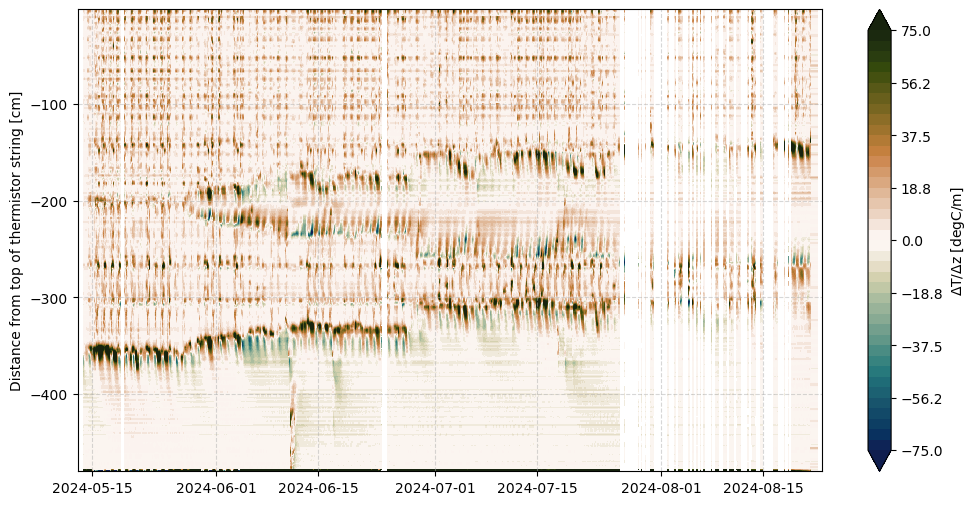

In [14]:
fig, ax = plt.subplots(1, figsize=(12,6))



cb = ax.contourf(season_data['dates'], season_data['height'][1:], np.swapaxes(dTdz,0,1), 
                     cmap=cmocean.cm.tarn_r, levels=np.linspace(-75,75,41), extend='both')
plt.colorbar(cb, ax=ax, label='$\Delta$T/$\Delta$z [degC/m]')


#ax.set_ylim(-478, -270)
ax.set_ylabel('Distance from top of thermistor string [cm]')
ax.grid(alpha=.5, ls='--')
ax.plot(asfs_data['dates'][ice_idx], -360.+(2.-asfs_data['sr50_dist_Avg'][ice_idx])*100., c='cyan', lw=1)
ax.axhline(y=-209*2, c='k', lw=1)
ax.axhline(y=-175*2, c='magenta', lw=1, ls='--')

ax.set_xlim(datetime.datetime(2024,5,15), datetime.datetime(2024,7,1))
fig.suptitle('Near SIMBA')

plt.tight_layout()
plt.show()

### trying to determine height using variability in time



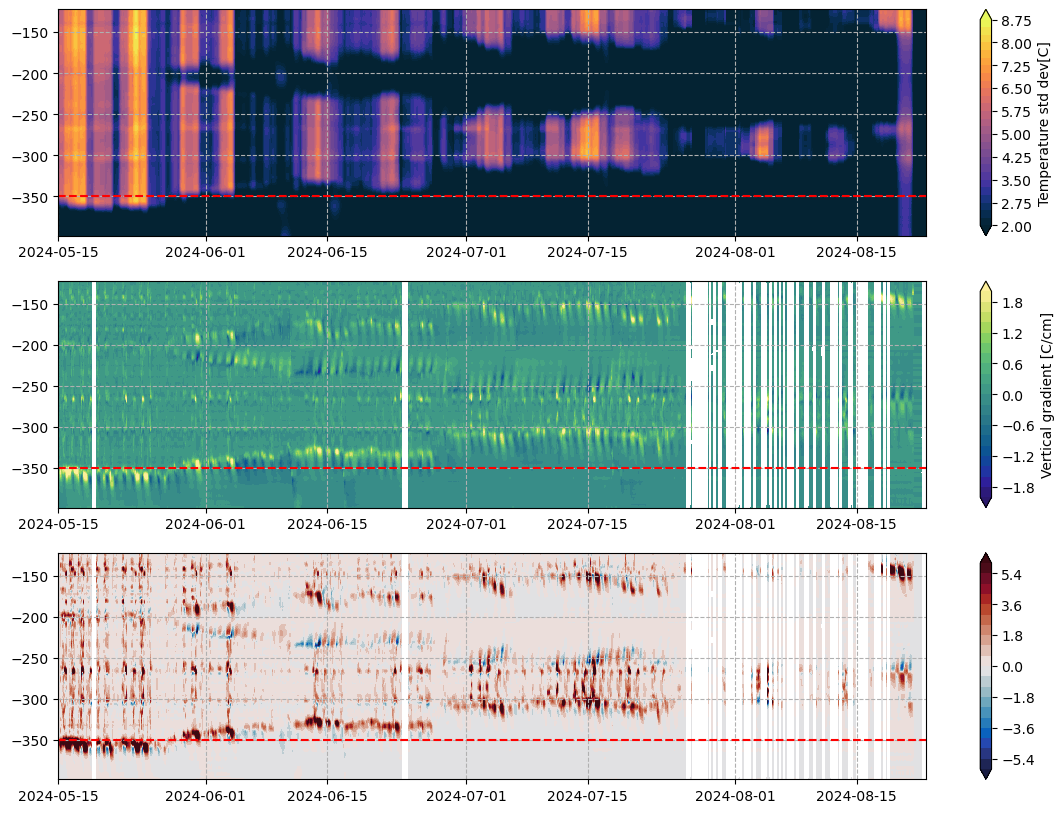

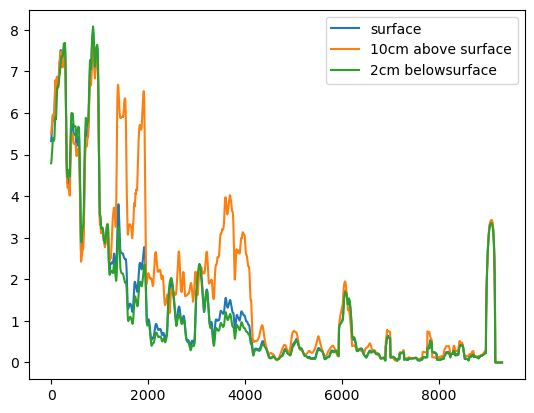

In [27]:
#season_data['dates'], season_data['height'],season_data['temperature']

heights = season_data['height']

h=48*4
may_st_idx = 2*24*4

known_height = []
above_height = []
below_height = []

std_profiles = []
vert_profiles = []

vertical_subset = np.where((heights<-120)&(heights>-400))[0]

plt_dates = []

for idx, t in np.ndenumerate(season_data['dates'][:]):#may_st_idx+3*24*4]):
    if t<datetime.datetime(2024,5,15):
        continue
    #print(t)
    # later base off of datetimes and time deltas to deal with missing data
    t_temp = season_data['temperature'][idx[0]:int(idx[0]+h),:].std(axis=0)
    std_profiles.append(t_temp)

    t_temp_vert = np.gradient(season_data['temperature'][idx[0],vertical_subset])

    vert_profiles.append(t_temp_vert)
    
    plt_dates.append(t)
    known_height.append(t_temp[np.where(heights==-175*2)[0]])
    above_height.append(t_temp[np.where(heights==-175*2+10)[0]])
    below_height.append(t_temp[np.where(heights==-175*2-2)[0]])

    #plt.plot(t_temp, heights, label=t)

fig, axs = plt.subplots(3, figsize=(14,10))
cb = axs[0].contourf(plt_dates, heights[vertical_subset], np.swapaxes(np.asarray(std_profiles)[:,vertical_subset],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(2,9,.25), extend='both')
plt.colorbar(cb, label='Temperature std dev[C]', ax=axs[0])


vert_profiles = np.ma.masked_outside(vert_profiles, -10,10)
cb = axs[1].contourf(plt_dates, heights[vertical_subset], np.swapaxes(vert_profiles,0,1),
                cmap=cmocean.cm.haline, levels=np.linspace(-2,2,21), extend='both')
plt.colorbar(cb, label='Vertical gradient [C/cm]', ax=axs[1])


product = np.asarray(std_profiles)[:,vertical_subset]*vert_profiles

cb = axs[2].contourf(plt_dates, heights[vertical_subset], np.swapaxes(product,0,1),
                cmap=cmocean.cm.balance, levels=np.linspace(-6,6,21), extend='both')
plt.colorbar(cb, ax=axs[2])
for ax in axs.ravel():
    ax.axhline(y=-350, c='r', ls='--')
    ax.grid(ls='--')
#axs[0].set_ylim(-410,-100)
#plt.xlim(datetime.datetime(2024,5,15), datetime.datetime(2024,7,1))

plt.show()

# plotting individual profiles
"""plt.ylim(-400,-300)
plt.xlabel('Temp std dev [degC]')
plt.ylabel('Height [cm]')
plt.axhline(y=-175*2, c='k', ls='--')
plt.show()"""

plt.plot(known_height, label='surface')
plt.plot(above_height, label='10cm above surface')
plt.plot(below_height, label='2cm belowsurface')
plt.legend(loc='best')
plt.show()

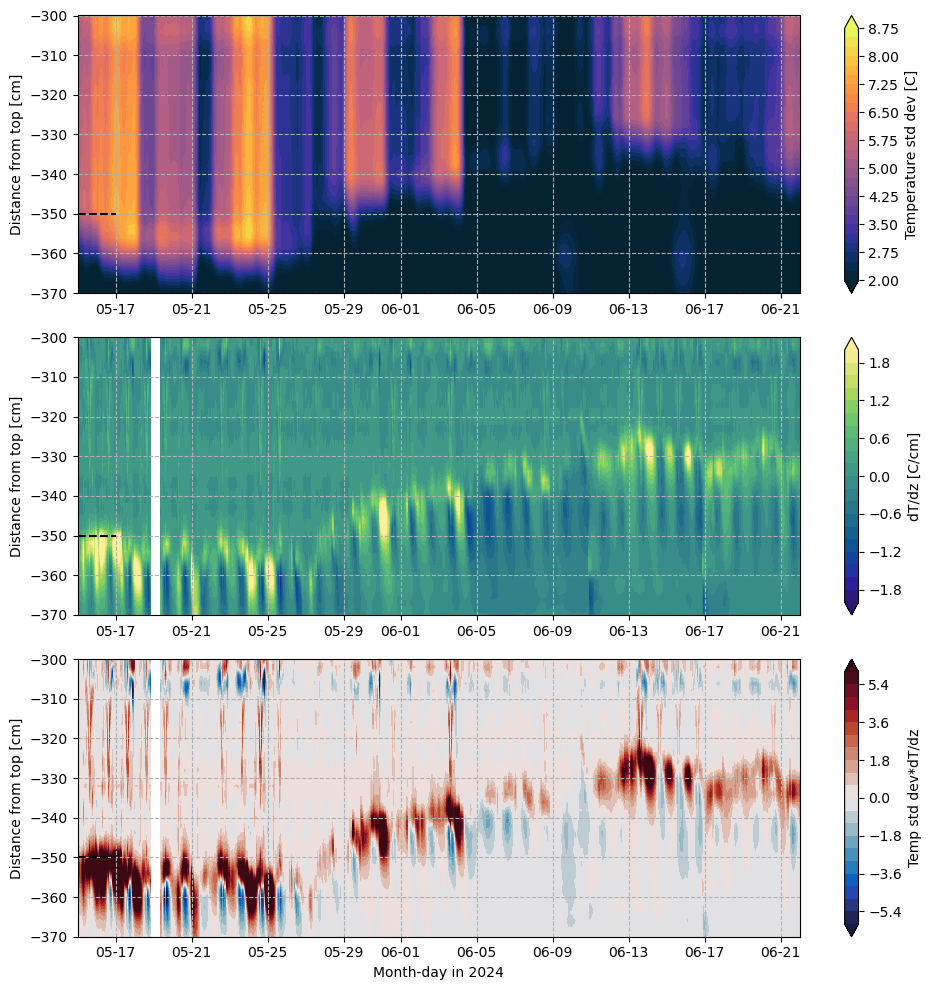

In [38]:
## just manually determine it

fig, axs = plt.subplots(3, figsize=(10,10), sharey=True)
cb = axs[0].contourf(plt_dates, heights[vertical_subset], np.swapaxes(np.asarray(std_profiles)[:,vertical_subset],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(2,9,.25), extend='both')
plt.colorbar(cb, label='Temperature std dev [C]', ax=axs[0])


vert_profiles = np.ma.masked_outside(vert_profiles, -10,10)
cb = axs[1].contourf(plt_dates, heights[vertical_subset], np.swapaxes(vert_profiles,0,1),
                cmap=cmocean.cm.haline, levels=np.linspace(-2,2,21), extend='both')
plt.colorbar(cb, label='dT/dz [C/cm]', ax=axs[1])


product = np.asarray(std_profiles)[:,vertical_subset]*vert_profiles

cb = axs[2].contourf(plt_dates, heights[vertical_subset], np.swapaxes(product,0,1),
                cmap=cmocean.cm.balance, levels=np.linspace(-6,6,21), extend='both')
plt.colorbar(cb, ax=axs[2], label='Temp std dev*dT/dz')
for ax in axs.ravel():
    ax.plot([datetime.datetime(2024,5,15),datetime.datetime(2024,5,17)], [-350,-350], c='k', ls='--')
    #[ax.axhline(y=i, linestyle='-.',  c='m', lw=1) for i in range(-360, -290,2)]
    #ax.grid(axis='x', which='both')
    ax.grid(ls='--')
    ax.set_ylabel('Distance from top [cm]')
    ax.set_xlim(datetime.datetime(2024,5,15), datetime.datetime(2024,6,22))
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
    
axs[0].set_ylim(-370,-300)
axs[2].set_xlabel('Month-day in 2024')
plt.tight_layout()
plt.savefig('Raven_SIMBA_sfc-id-example_Tstd-dTdz_20240515-20240622.png')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, figsize=(14,10))
cb = axs[0].contourf(plt_dates, heights, np.swapaxes(np.asarray(std_profiles),0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(2,9,.25), extend='both')
plt.colorbar(cb, label='Temperature std dev[C]', ax=axs[0])

cb = axs[0].contourf(plt_dates, heights[vertical_subset], vert_profiles,
                cmap=cmocean.cm.haline, )#levels=np.arange(2,9,.25), extend='both')
plt.colorbar(cb, label='Vertical gradient [C/cm]', ax=axs[1])

for ax in axs.ravel():
    ax.axhline(y=-350, c='r')
    ax.set_ylim(-410,-100)
#plt.xlim(datetime.datetime(2024,5,15), datetime.datetime(2024,7,1))

plt.show()

### manually determined heights from above plots

In [23]:
# read in manual heights, assess and adjust!
man_heights = np.genfromtxt('/home/asledd/ICECAPS/SLEIGH_SIMBA_manual_sfc_id.csv', delimiter=',', skip_header=3)

## say what's what
sfc_heights = {'dates':np.asarray([ datetime.datetime(int(value[0]),int(value[1]),int(value[2])) for value in man_heights]),
               'surface':np.asarray([ value[3]-2. for value in man_heights])}

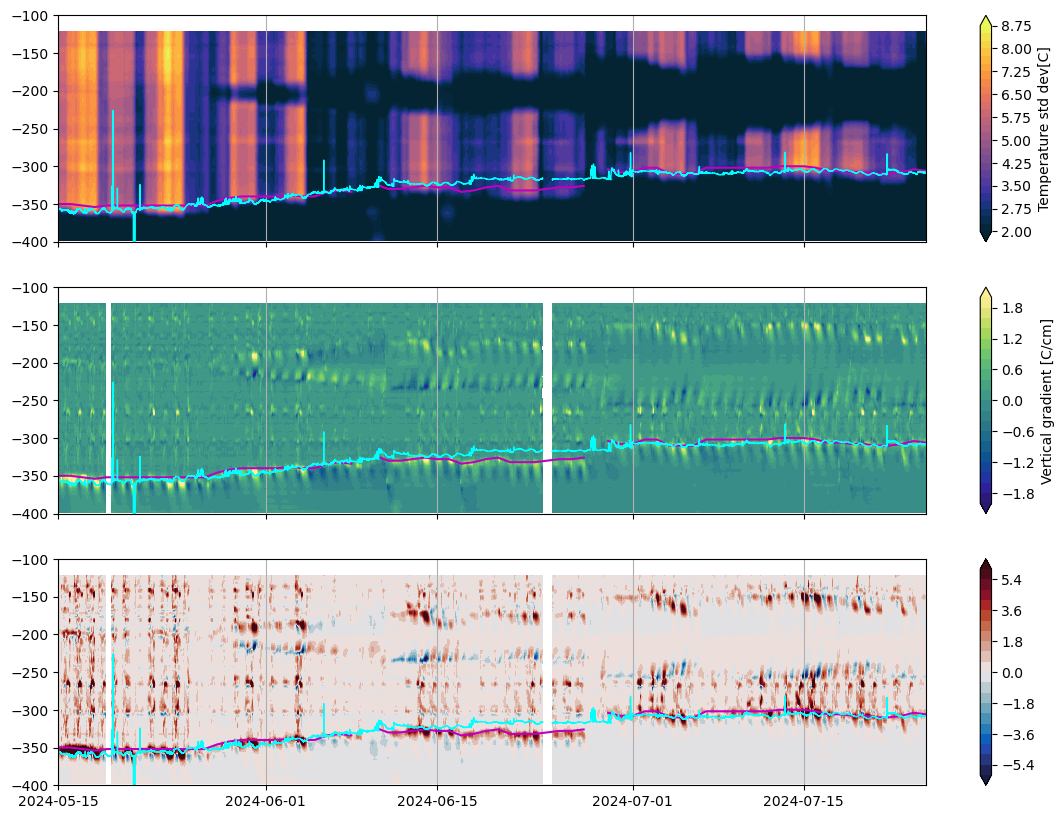

In [28]:
## just manually determine it

fig, axs = plt.subplots(3, figsize=(14,10), sharex=True, sharey=True)
cb = axs[0].contourf(plt_dates, heights[vertical_subset], np.swapaxes(np.asarray(std_profiles)[:,vertical_subset],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(2,9,.25), extend='both')
plt.colorbar(cb, label='Temperature std dev[C]', ax=axs[0])


vert_profiles = np.ma.masked_outside(vert_profiles, -10,10)
cb = axs[1].contourf(plt_dates, heights[vertical_subset], np.swapaxes(vert_profiles,0,1),
                cmap=cmocean.cm.haline, levels=np.linspace(-2,2,21), extend='both')
plt.colorbar(cb, label='Vertical gradient [C/cm]', ax=axs[1])


product = np.asarray(std_profiles)[:,vertical_subset]*vert_profiles

cb = axs[2].contourf(plt_dates, heights[vertical_subset], np.swapaxes(product,0,1),
                cmap=cmocean.cm.balance, levels=np.linspace(-6,6,21), extend='both')
plt.colorbar(cb, ax=axs[2])
for ax in axs.ravel():
    #ax.axhline(y=-350, c='k', ls='--')
    ax.grid(axis='x', which='both')
    ax.plot(sfc_heights['dates'], sfc_heights['surface'], c='m')
    ax.plot(asfs_data['dates'][ice_idx], -360.+(2.-asfs_data['sr50_dist_Avg'][ice_idx])*100., c='cyan', lw=1)

axs[0].set_ylim(-400,-100)
ax.set_xlim(datetime.datetime(2024,5,15), datetime.datetime(2024,7,25))

plt.show()

## back to exploring temp gradients and such

Try plotting some profiles of temp and gradients

Quick and dirty comparison of surface temperatures

In [30]:
print(asfs_data_summ.keys())

dict_keys(['skin_temp_mean', 'dates'])


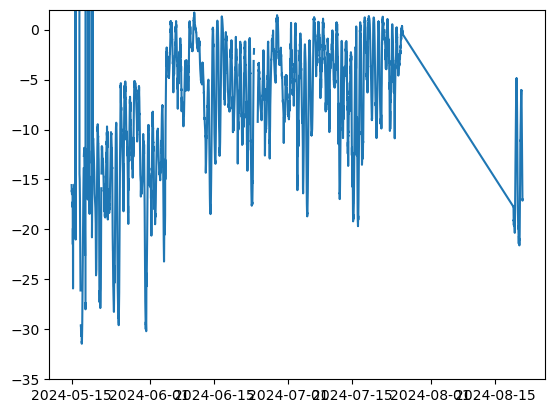

In [31]:
plt.plot(asfs_data_summ['dates'], asfs_data_summ['skin_temp_mean'], label='skin_temp_mean')
plt.ylim(-35,2)
plt.show()

In [36]:
print(asfs_data_summ['dates'][asfs_summ_idx])

[datetime.datetime(2024, 5, 15, 0, 0)
 datetime.datetime(2024, 5, 15, 0, 15)
 datetime.datetime(2024, 5, 15, 0, 30) ...
 datetime.datetime(2024, 5, 26, 23, 15)
 datetime.datetime(2024, 5, 26, 23, 30)
 datetime.datetime(2024, 5, 26, 23, 45)]


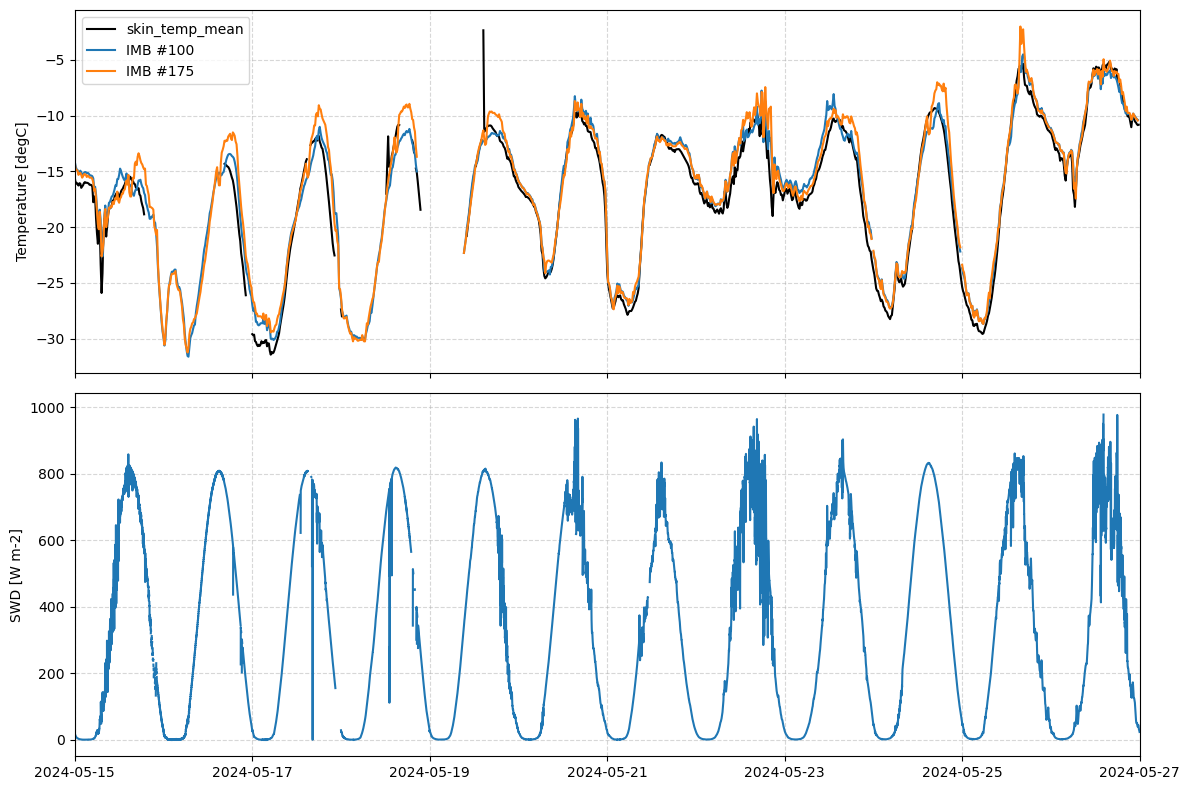

In [35]:
fig, ax = plt.subplots(2, figsize=(12,8), sharex=True)
asfs_summ_idx = np.where((asfs_data_summ['dates']>datetime.datetime(2024,5,13))&(asfs_data_summ['dates']<datetime.datetime(2024,5,27)))[0]
#ax[0].plot(asfs_data['dates'][asfs_idx], asfs_data['apogee_body_T_Avg'][asfs_idx], label='apogee_body_T_Avg')
ax[0].plot(asfs_data_summ['dates'][asfs_summ_idx], np.ma.masked_greater(asfs_data_summ['skin_temp_mean'][asfs_summ_idx],1), 
           c='k', label='skin_temp_mean')

#ax[0].set_ylim(-35,0)
imb_idx = np.where((season_data['dates']>=datetime.datetime(2024,5,13))&(season_data['dates']<datetime.datetime(2024,5,27)))[0]


imb_sfc_idx = np.where(season_data['height']==-364)[0]
#ax[0].plot(season_data['dates'][imb_idx], season_data['temperature'][imb_idx,:][:,imb_sfc_idx], label='IMB #182')



imb_sfc2_idx = np.where(season_data['height']==-200)[0]
ax[0].plot(season_data['dates'][imb_idx], season_data['temperature'][imb_idx,:][:,imb_sfc2_idx], label='IMB #100')

imb_sfc_idx = np.where(season_data['height']==-350)[0]
ax[0].plot(season_data['dates'][imb_idx], season_data['temperature'][imb_idx,:][:,imb_sfc_idx], label='IMB #175') #ls='--', 

ax[0].set_xlim(datetime.datetime(2024, 5, 15), datetime.datetime(2024,5,27))

ax[0].grid(alpha=.5, ls='--')
ax[0].legend(loc='best')
ax[0].set_ylabel('Temperature [degC]')

asfs_idx = np.where((asfs_data['dates']>datetime.datetime(2024,5,13))&(asfs_data['dates']<datetime.datetime(2024,5,27)))[0]

ax[1].plot(asfs_data['dates'][asfs_idx], np.ma.masked_outside(asfs_data['sr30_swd_IrrC_Avg'][asfs_idx],-50,1000))
ax[1].set_ylabel('SWD [W m-2]')
ax[1].grid(alpha=.5, ls='--')

plt.tight_layout()
plt.savefig('Raven_IMB-SLEIGH_sfc-temps_therm100-175.png', dpi=200)
plt.show()

In [43]:
asfs_idx = np.where((asfs_data['dates']>=datetime.datetime(2024,5,15))&(asfs_data['dates']<datetime.datetime(2024,5,27)))[0]

print( asfs_data['dates'][asfs_idx])

[datetime.datetime(2024, 5, 15, 0, 0) datetime.datetime(2024, 5, 15, 0, 1)
 datetime.datetime(2024, 5, 15, 0, 2) ...
 datetime.datetime(2024, 5, 26, 23, 57)
 datetime.datetime(2024, 5, 26, 23, 58)
 datetime.datetime(2024, 5, 26, 23, 59)]


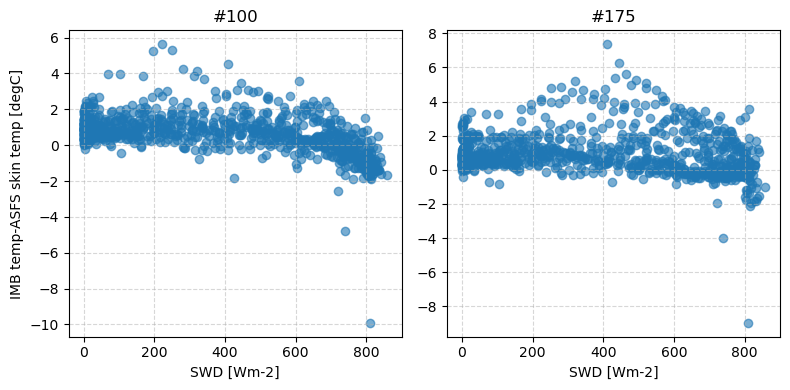

In [59]:
fig, axs = plt.subplots(1,2, figsize=(8,4), sharex=True)

asfs_summ_idx = np.where((asfs_data_summ['dates']>=datetime.datetime(2024,5,15))&(asfs_data_summ['dates']<datetime.datetime(2024,5,27)))[0]
asfs_skin = np.ma.masked_greater(asfs_data_summ['skin_temp_mean'][asfs_summ_idx],1)

swd = np.ma.masked_outside(asfs_data_summ['sr30_swd_IrrC_mean'][asfs_summ_idx],-50,1000)

imb_idx = np.where((season_data['dates']>=datetime.datetime(2024,5,15))&(season_data['dates']<datetime.datetime(2024,5,27)))[0]


imb_sfc2_idx = np.where(season_data['height']==-200)[0]
imb_temp_100 = np.squeeze(season_data['temperature'][imb_idx,:][:,imb_sfc2_idx])

imb_sfc_idx = np.where(season_data['height']==-350)[0]
imb_temp_175 = np.squeeze(season_data['temperature'][imb_idx,:][:,imb_sfc_idx])


for imb_data, imb_label, ax in zip([imb_temp_100, imb_temp_175],['#100','#175'], axs.ravel()):
    temp_diff = imb_data-asfs_skin

    ax.scatter(swd, temp_diff, alpha=.6)
    ax.set_title(imb_label)

    ax.grid(alpha=.5, ls='--')
    ax.set_xlabel('SWD [Wm-2]')

axs[0].set_ylabel('IMB temp-ASFS skin temp [degC]')


plt.tight_layout()
#plt.savefig('Raven_IMB-SLEIGH_sfc-temps_therm100-175.png', dpi=200)
plt.show()

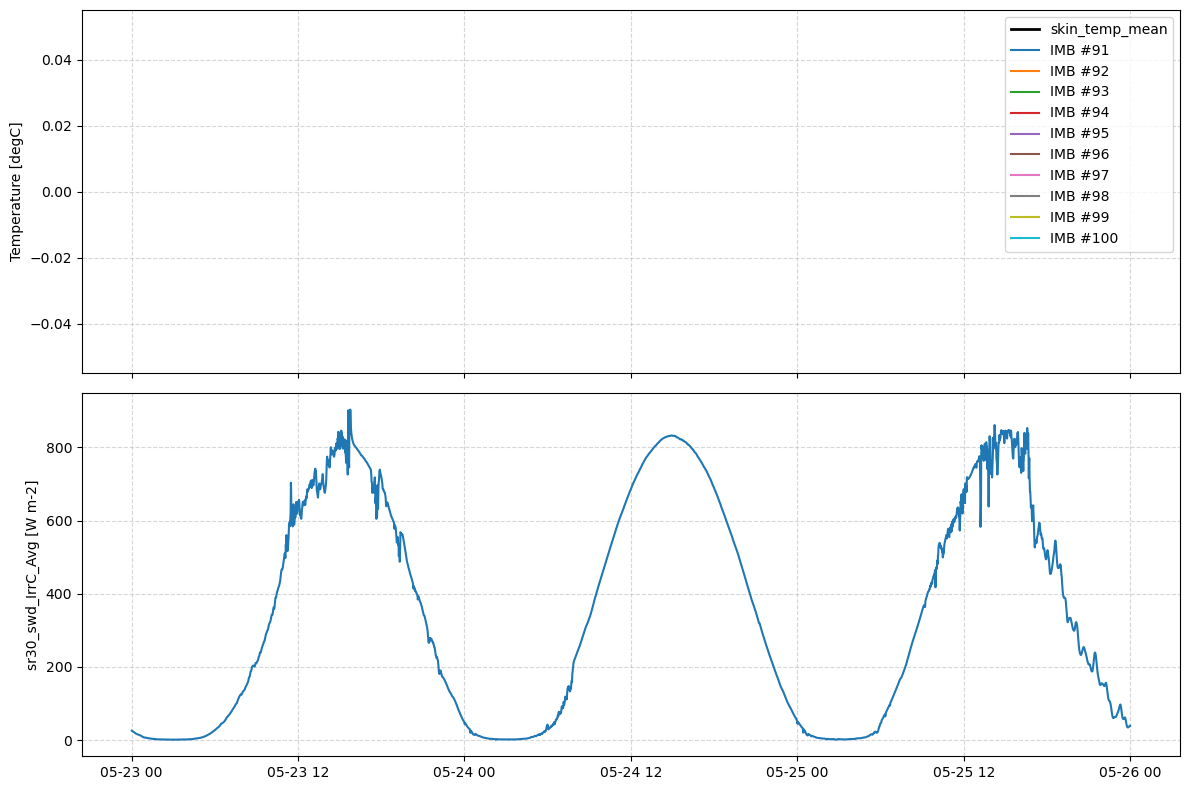

In [58]:
fig, ax = plt.subplots(2, figsize=(12,8), sharex=True)
asfs_summ_idx = np.where((asfs_data_summ['dates']>datetime.datetime(2024,5,23))&(asfs_data_summ['dates']<datetime.datetime(2024,5,18)))[0]
#ax[0].plot(asfs_data['dates'][asfs_idx], asfs_data['apogee_body_T_Avg'][asfs_idx], label='apogee_body_T_Avg')
ax[0].plot(asfs_data_summ['dates'][asfs_summ_idx], 
           np.ma.masked_greater(asfs_data_summ['skin_temp_mean'][asfs_summ_idx],1), label='skin_temp_mean', lw=2, c='k')

#ax[0].set_ylim(-35,0)
imb_idx = np.where((season_data['dates']>=datetime.datetime(2024,5,23))&(season_data['dates']<datetime.datetime(2024,5,18)))[0]

for imb_num in range(91,101):
    imb_sfc2_idx = np.where(season_data['height']==-2*imb_num)[0]
    ax[0].plot(season_data['dates'][imb_idx], season_data['temperature'][imb_idx,:][:,imb_sfc2_idx], label='IMB #'+str(imb_num))




ax[0].grid(alpha=.5, ls='--')
ax[0].legend(loc='best')
ax[0].set_ylabel('Temperature [degC]')

asfs_idx = np.where((asfs_data['dates']>datetime.datetime(2024,5,23))&(asfs_data['dates']<datetime.datetime(2024,5,26)))[0]

ax[1].plot(asfs_data['dates'][asfs_idx], np.ma.masked_outside(asfs_data['sr30_swd_IrrC_Avg'][asfs_idx],-50,1000))
ax[1].set_ylabel('sr30_swd_IrrC_Avg [W m-2]')
ax[1].grid(alpha=.5, ls='--')

plt.tight_layout()
#plt.savefig('Raven_IMB-SLEIGH_sfc-temps_therm100-180-175.png', dpi=200)
plt.show()

### Back to comparing surface height and temp gradients

In [66]:
dTdt_lims = np.linspace(-2,2,41)
dTdt_lims = np.delete(dTdt_lims, np.where(dTdt_lims==0))
print(dTdt_lims)

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8
  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]


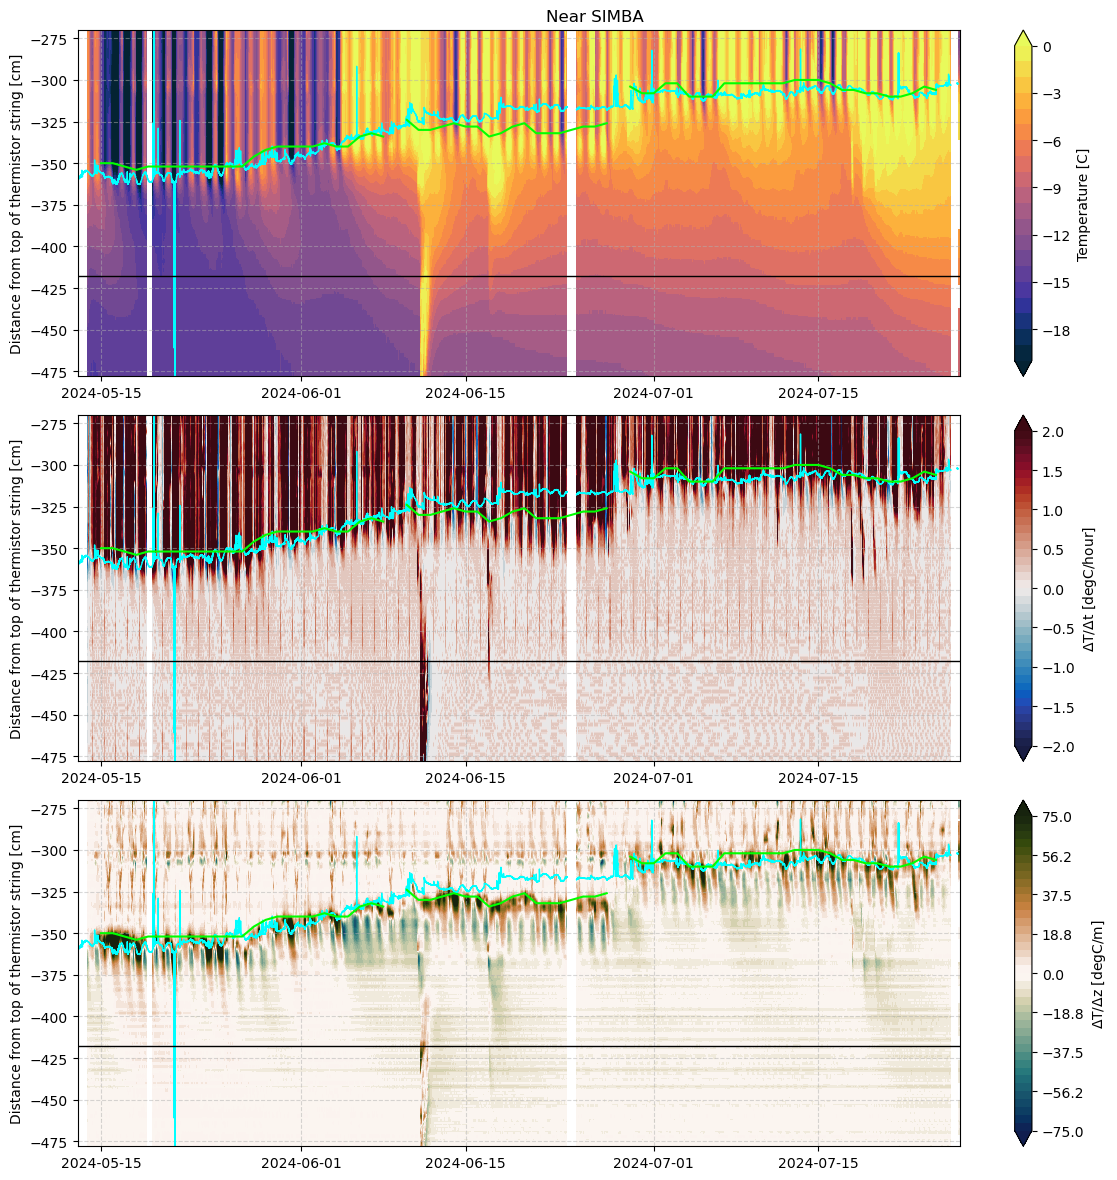

In [62]:
fig, axs = plt.subplots(3, figsize=(12,12))

## figure out pythonic looping later
cb = axs[0].contourf(season_data['dates'], season_data['height'], np.swapaxes(season_data['temperature'],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(-20,1,1), extend='both')
plt.colorbar(cb, ax=axs[0], label='Temperature [C]')

dTdt_lims = np.linspace(-2,2,41)
dTdt_lims = np.delete(dTdt_lims, np.where(dTdt_lims==0)[0])
cb = axs[1].contourf(season_data['dates'][1:], season_data['height'], np.swapaxes(dTdt_hr,0,1), 
                     cmap=cmocean.cm.balance, levels=dTdt_lims, extend='both')
plt.colorbar(cb, ax=axs[1], label='$\Delta$T/$\Delta$t [degC/hour]')

cb = axs[2].contourf(season_data['dates'], season_data['height'][1:], np.swapaxes(dTdz,0,1), 
                     cmap=cmocean.cm.tarn_r, levels=np.linspace(-75,75,41), extend='both')
plt.colorbar(cb, ax=axs[2], label='$\Delta$T/$\Delta$z [degC/m]')

for ax in axs.ravel():
    ax.set_ylim(-478, -270)
    ax.set_ylabel('Distance from top of thermistor string [cm]')
    ax.grid(alpha=.5, ls='--')
    ax.plot(asfs_data['dates'][ice_idx], -360.+(2.-asfs_data['sr50_dist_Avg'][ice_idx])*100., c='cyan', lw=1)
    ax.axhline(y=-209*2, c='k', lw=1)
    # ax.axhline(y=-175*2, c='magenta', lw=1, ls='--')
    ax.plot(sfc_heights['dates'], sfc_heights['surface'], c='lime')

    ax.set_xlim(datetime.datetime(2024,5,13), datetime.datetime(2024,7,27))
fig.suptitle('Near SIMBA')

plt.tight_layout()
plt.show()

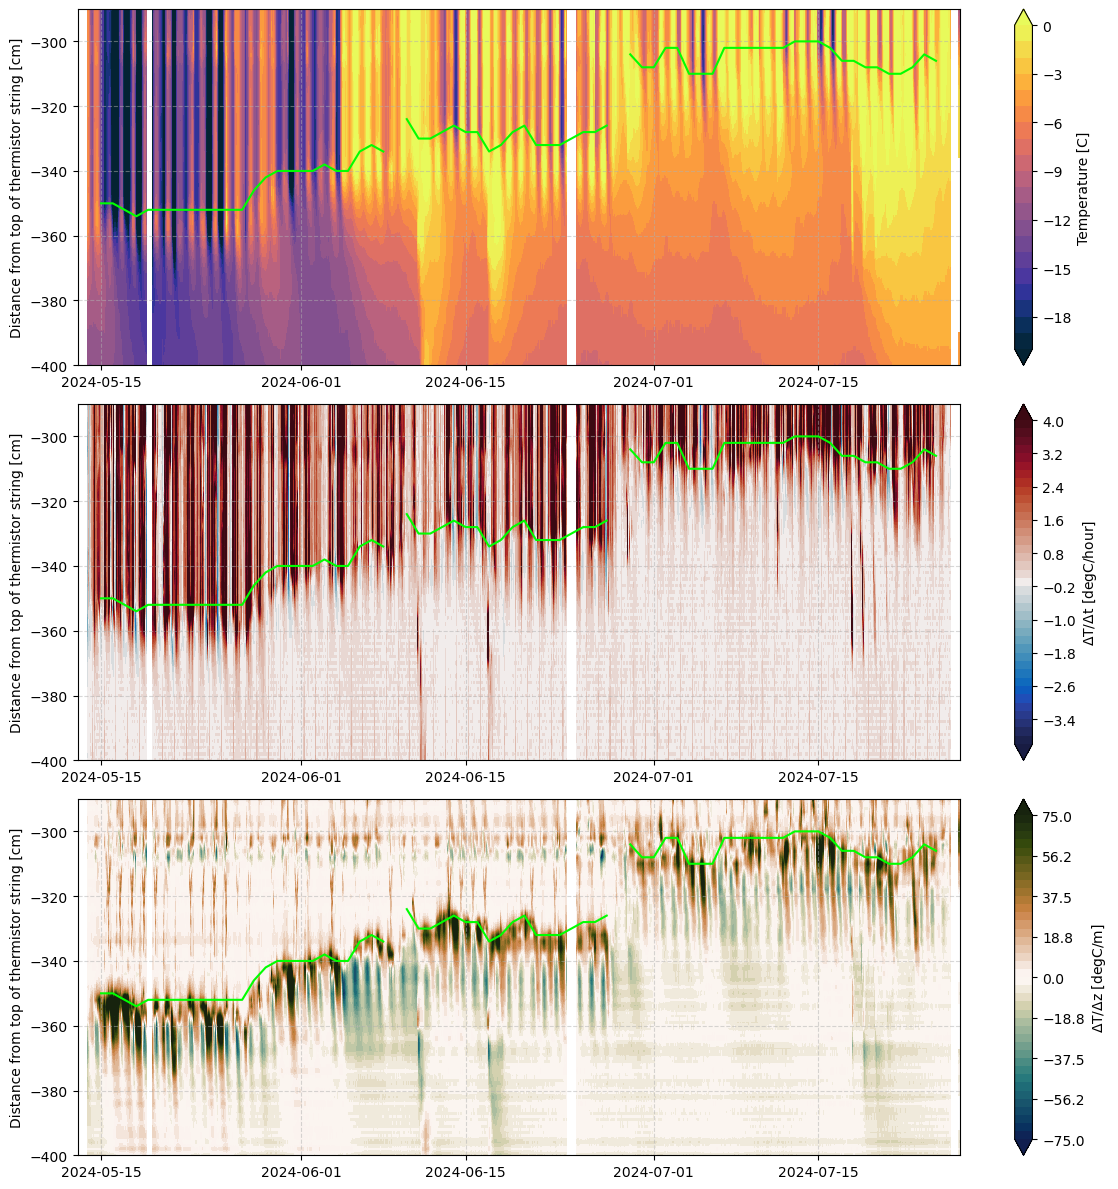

In [25]:
fig, axs = plt.subplots(3, figsize=(12,12))

## figure out pythonic looping later
cb = axs[0].contourf(season_data['dates'], season_data['height'], np.swapaxes(season_data['temperature'],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(-20,1,1), extend='both')
plt.colorbar(cb, ax=axs[0], label='Temperature [C]')

dTdt_lims = np.linspace(-4,4,41)
dTdt_lims = np.delete(dTdt_lims, np.where(dTdt_lims==0)[0])
cb = axs[1].contourf(season_data['dates'][1:], season_data['height'], np.swapaxes(dTdt_hr,0,1), 
                     cmap=cmocean.cm.balance, levels=dTdt_lims, extend='both')
plt.colorbar(cb, ax=axs[1], label='$\Delta$T/$\Delta$t [degC/hour]')

cb = axs[2].contourf(season_data['dates'], season_data['height'][1:], np.swapaxes(dTdz,0,1), 
                     cmap=cmocean.cm.tarn_r, levels=np.linspace(-75,75,41), extend='both')
plt.colorbar(cb, ax=axs[2], label='$\Delta$T/$\Delta$z [degC/m]')

for ax in axs.ravel():
    ax.set_ylim(-400, -290)
    ax.set_ylabel('Distance from top of thermistor string [cm]')
    ax.grid(alpha=.5, ls='--')
    # ax.plot(asfs_data['dates'][ice_idx], -350.+(2.-asfs_data['sr50_dist_Avg'][ice_idx])*100., c='cyan', lw=1)
    ax.axhline(y=-209*2, c='k', lw=1)
    # ax.axhline(y=-175*2, c='magenta', lw=1, ls='--')
    ax.plot(sfc_heights['dates'], sfc_heights['surface'], c='lime')

    ax.set_xlim(datetime.datetime(2024,5,13), datetime.datetime(2024,7,27))
#fig.suptitle('Near SIMBA')

plt.tight_layout()
plt.savefig('Raven_T-dTdt-dTdz-contours_manual-sfc_20240513-20240727.png')
plt.show()

At night surface is cooler -> temp gradient is positive -> conduction going up to surface -> cooling

Ideas to talk about with Matt: where is surface?? made manual estimates; negative dT/dz below the surface also happens early in the time series when the surface is more certain

In [24]:
def find_roots(x,y):
    s = np.abs(np.diff(np.sign(y))).astype(bool)
    return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

In [26]:
## convert dates into seconds so that it can be used to find intersections
asfs_data_summ['seconds'] = np.asarray([(t-datetime.datetime(1970,1,1)).total_seconds() for t in asfs_data_summ['dates']])

In [42]:
# pltx=np.interp(0., np.ma.masked_greater(asfs_data_summ['skin_temp_mean'],1), asfs_data_summ['seconds'])
zero_seconds = find_roots(asfs_data_summ['seconds'],np.ma.masked_greater(asfs_data_summ['skin_temp_mean'],1))
zero_dates = np.asarray([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=ts) for ts in zero_seconds if ts])
# print(zero_dates)

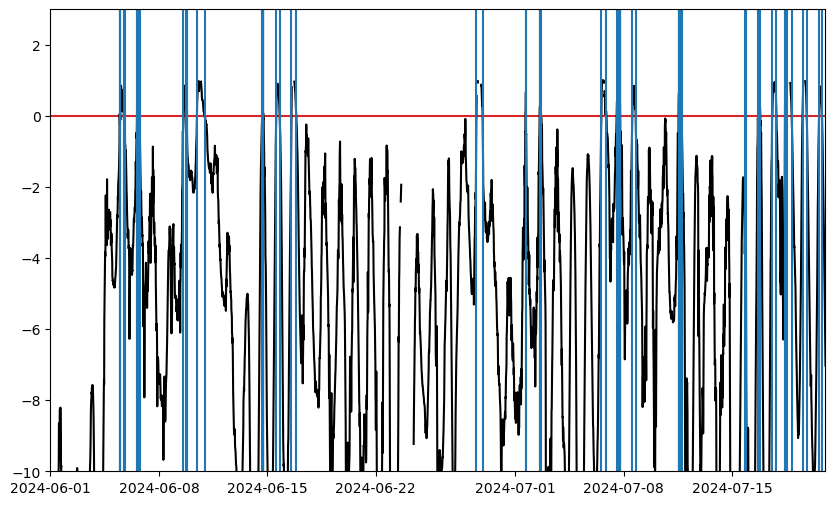

In [45]:
fig, ax = plt.subplots(1, figsize=(10,6))
plt.axhline(y=0, c='tab:red')
plt.plot(asfs_data_summ['dates'], np.ma.masked_greater(asfs_data_summ['skin_temp_mean'],1), 
           c='k', label='skin_temp_mean')
for dt in zero_dates:
    plt.axvline(x=dt)
plt.ylim(-10,3)
plt.xlim(datetime.datetime(2024,6,1),datetime.datetime(2024,7,21))
plt.show()

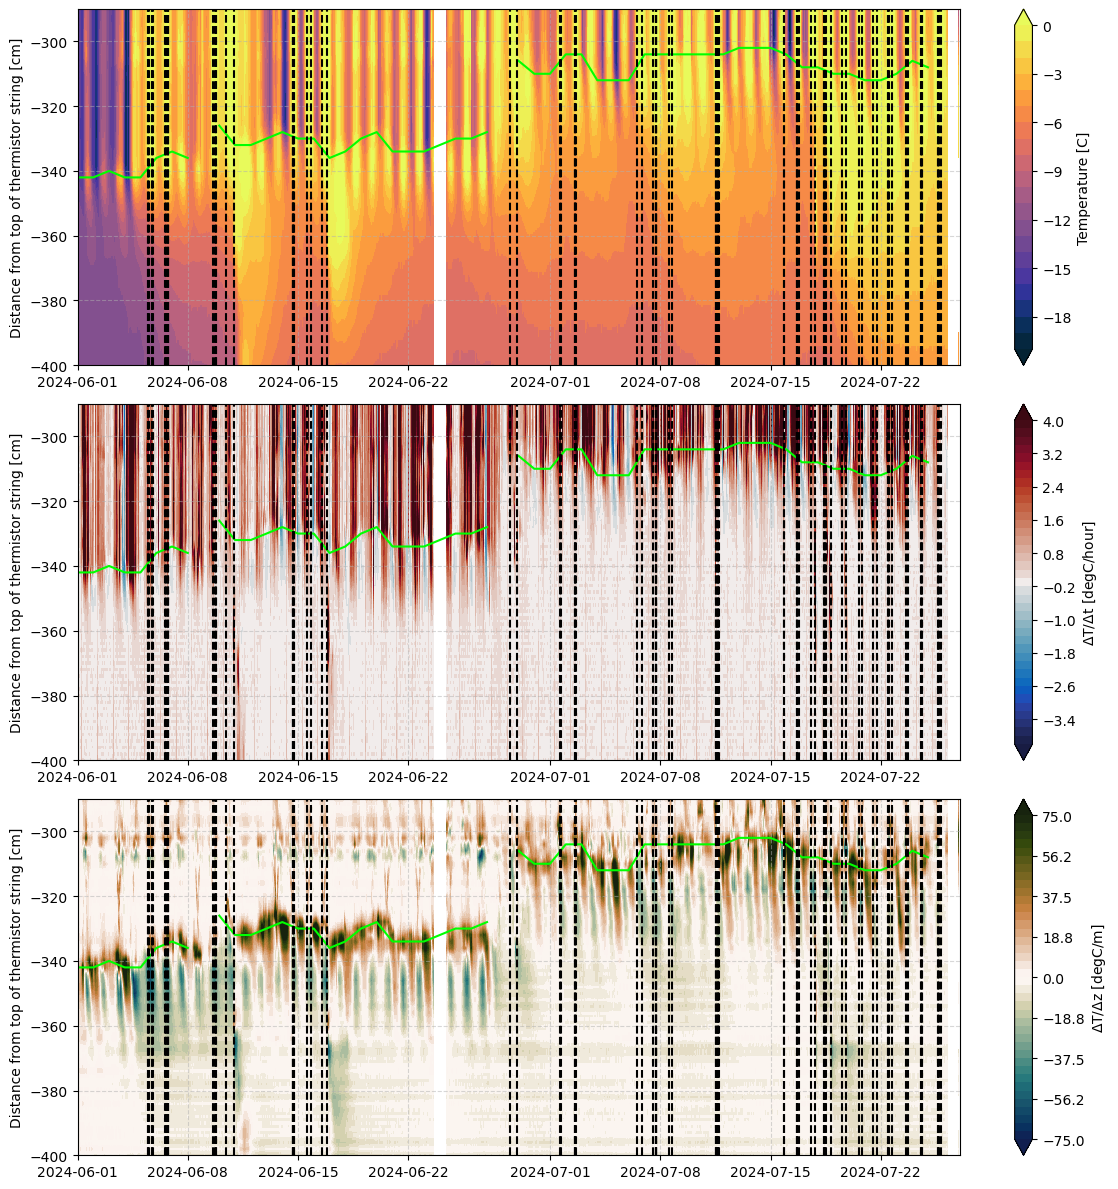

In [49]:
fig, axs = plt.subplots(3, figsize=(12,12))

## figure out pythonic looping later
cb = axs[0].contourf(season_data['dates'], season_data['height'], np.swapaxes(season_data['temperature'],0,1),
                cmap=cmocean.cm.thermal, levels=np.arange(-20,1,1), extend='both')
plt.colorbar(cb, ax=axs[0], label='Temperature [C]')

dTdt_lims = np.linspace(-4,4,41)
dTdt_lims = np.delete(dTdt_lims, np.where(dTdt_lims==0)[0])
cb = axs[1].contourf(season_data['dates'][1:], season_data['height'], np.swapaxes(dTdt_hr,0,1), 
                     cmap=cmocean.cm.balance, levels=dTdt_lims, extend='both')
plt.colorbar(cb, ax=axs[1], label='$\Delta$T/$\Delta$t [degC/hour]')

cb = axs[2].contourf(season_data['dates'], season_data['height'][1:], np.swapaxes(dTdz,0,1), 
                     cmap=cmocean.cm.tarn_r, levels=np.linspace(-75,75,41), extend='both')
plt.colorbar(cb, ax=axs[2], label='$\Delta$T/$\Delta$z [degC/m]')

for ax in axs.ravel():
    ax.set_ylim(-400, -290)
    ax.set_ylabel('Distance from top of thermistor string [cm]')
    ax.grid(alpha=.5, ls='--')
    # ax.plot(asfs_data['dates'][ice_idx], -350.+(2.-asfs_data['sr50_dist_Avg'][ice_idx])*100., c='cyan', lw=1)
    ax.axhline(y=-209*2, c='k', lw=1)
    # ax.axhline(y=-175*2, c='magenta', lw=1, ls='--')
    ax.plot(sfc_heights['dates'], sfc_heights['surface'], c='lime')

    ## want to add indication of where skin temp indications melting
    # asfs_data_summ['dates'][asfs_summ_idx], np.ma.masked_greater(asfs_data_summ['skin_temp_mean'][asfs_summ_idx],1)
    for dt in zero_dates:
        ax.axvline(x=dt, c='k', ls='--', lw=1)
    ax.set_xlim(datetime.datetime(2024,6,1), datetime.datetime(2024,7,27))
#fig.suptitle('Near SIMBA')

plt.tight_layout()
# plt.savefig('Raven_T-dTdt-dTdz-contours_manual-sfc_20240513-20240727.png')
plt.show()